In [5]:
#DengAI: Predicting Disease Spread

In [ ]:
#Hypothesis
Because dengue fever is a tropical disease, we would expect it to be more popular in place with high temperature, 
high precipitation and thus high humidity.
The disease is transmitted by mosquitoes, whose peak season is summer, so we will expect summer to have more dengue 
cases than the rest of the year.
Iquitos is a Peruvian port city and gateway to the jungle lodges and tribal villages of the northern Amazon. 
Surrounded by green spaces and water sources, it is an ideal environment for mosquitoes. 
San juan, in the other hand, is a city on an island (more isolated) and has a much lower population density than Iquitos.
All these informations suggest that we will need 2 separate models, one for each city.

In [1]:
#To install packages try this in condo r

#import pip
#package_name='tqdm'
#pip.main(['install', package_name])

In [2]:
import re
import time
import datetime 
import operator
import numpy as np
import pandas as pd 
import collections
import unicodedata
import collections
import seaborn as sns
import collections
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt

from tqdm import tqdm
from collections import Counter
from datetime import datetime, date, timedelta
from IPython.display import Image
%matplotlib inline
#If the IPython notebook is used the inline backend can be invoked to remove the necessity of calling show after each plot.


In [3]:
#Data reading
#Load train and test csv file
dengue_features_train = pd.read_csv('F:/OneDrive - Texas Tech University/MastersDocuments/DS-Predictive Analytics/DengAI/DataSet/dengue_features_train.csv')
dengue_features_test = pd.read_csv('F:/OneDrive - Texas Tech University/MastersDocuments/DS-Predictive Analytics/DengAI/DataSet/dengue_features_test.csv')
dengue_labels_train = pd.read_csv('F:/OneDrive - Texas Tech University/MastersDocuments/DS-Predictive Analytics/DengAI/DataSet/dengue_labels_train.csv')


In [4]:
#Display the train data
dengue_features_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [5]:
dengue_features_train.describe()

D:\Installation\Anaconda2-4-2-0\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2002.000000,26.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2005.000000,39.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


In [6]:
dengue_features_train.describe(include = ['object'])

,city,week_start_date
count,1456,1456
unique,2,1049
top,sj,2006-09-03
freq,936,2


In [7]:
#row count 
dengue_features_train.shape

(1456, 24)

In [8]:
#The dataset contains information on 1456 weeks for the 2 cities across 24 features.

In [9]:
dengue_labels_train.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [10]:

#Let's fusion the 2 dataframes:
#Merging the Train dataframe with the labels data frame 

dengue_train = pd.merge(dengue_labels_train, dengue_features_train, on=['city','year','weekofyear'])

In [11]:
dengue_train.head()

,city,year,weekofyear,total_cases,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,4,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,5,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,4,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,3,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,6,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [12]:
dengue_train.shape

(1456, 25)

In [13]:
#Check duplicate rows
np.sum(dengue_train.duplicated())

0

In [15]:
dengue_features_test.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [16]:
dengue_features_test.shape

(416, 24)

In [14]:
#Check duplicate rows
np.sum(dengue_features_test.duplicated())


0

In [ ]:
#Lets do Exploratory data analysis based on the city

#City : San Juan, Puerto Rico (sj) 
#City2 : Iquitos (iq)

(0, 0.09)

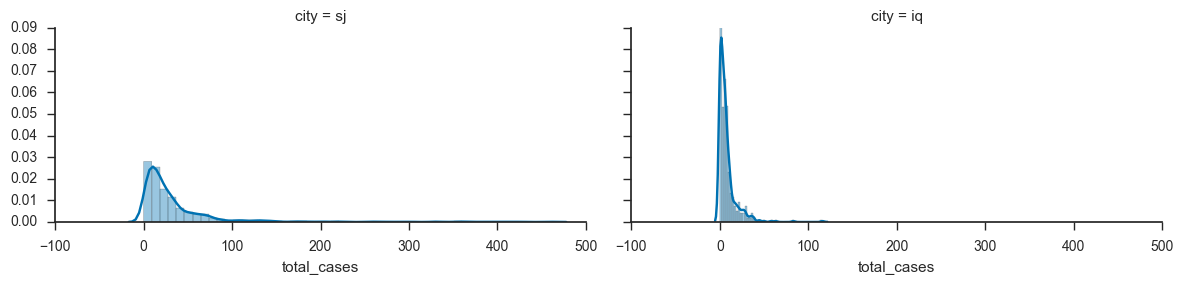

In [101]:
#Lets check the total cases of Dengue in the city's
sns.set(style="ticks", palette="colorblind")
g = sns.FacetGrid(dengue_train, col="city",aspect=2)  
g.map(sns.distplot, "total_cases") 
axes = g.axes
axes[0,0].set_ylim(0,0.090)
axes[0,1].set_ylim(0,0.090)

In [ ]:
#It is clear from the above that the The total cases of dengue is more in Iquitos must be higher than that of San juan 
#for a certain period.
#Lets see the factors also, like station_precip_mm, station_max_temp_c, station_min_temp_c and so on.

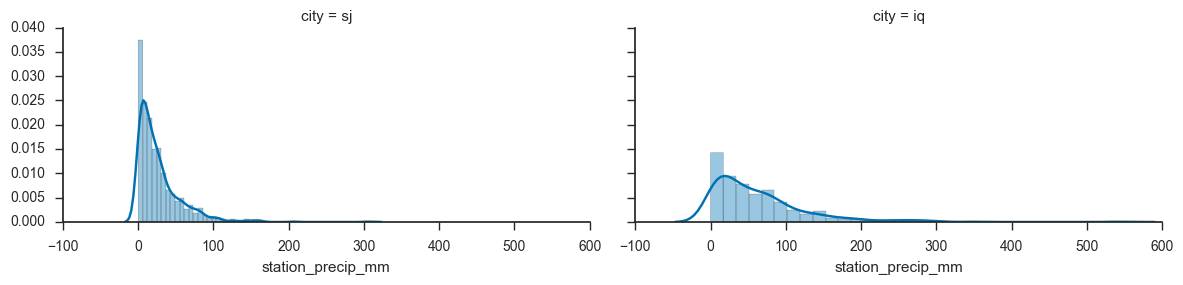

In [102]:
#Lets check the station_precip_mm in the city's
sns.set(style="ticks", palette="colorblind")
g = sns.FacetGrid(dengue_train, col="city",aspect=2)  
g.map(sns.distplot, "station_precip_mm") 


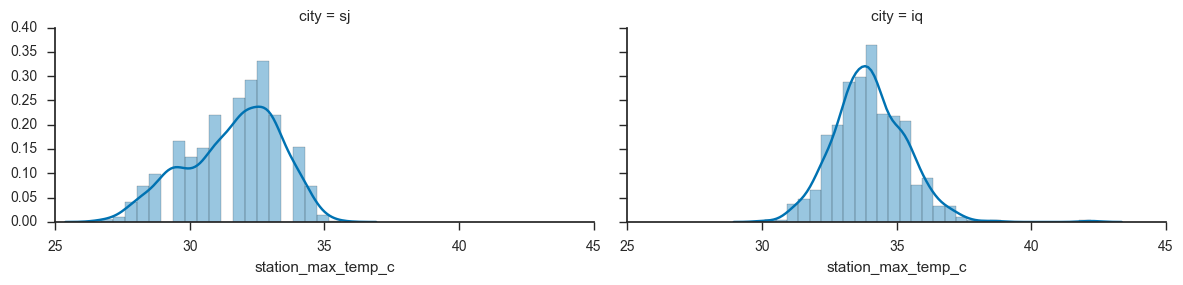

In [100]:
#Lets check the station_max_temp_c in the city's
sns.set(style="ticks", palette="colorblind")
g = sns.FacetGrid(dengue_train, col="city",aspect=2)  
g.map(sns.distplot, "station_max_temp_c") 

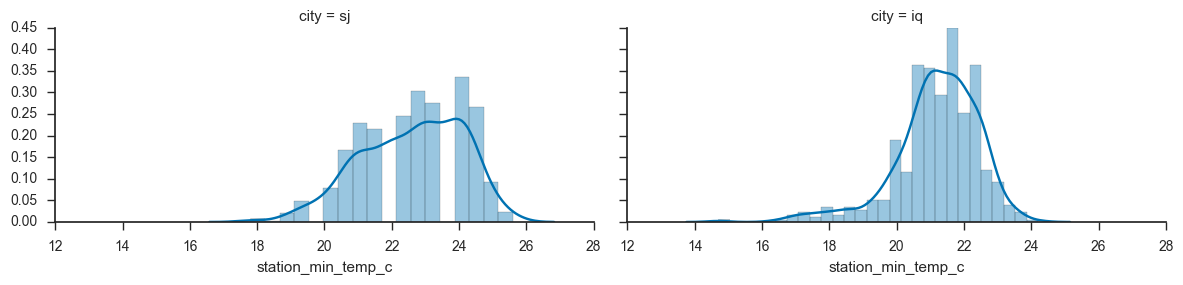

In [99]:
#Lets check the station_min_temp_c in the city's
sns.set(style="ticks", palette="colorblind")
g = sns.FacetGrid(dengue_train, col="city",aspect=2)  
g.map(sns.distplot, "station_min_temp_c") 

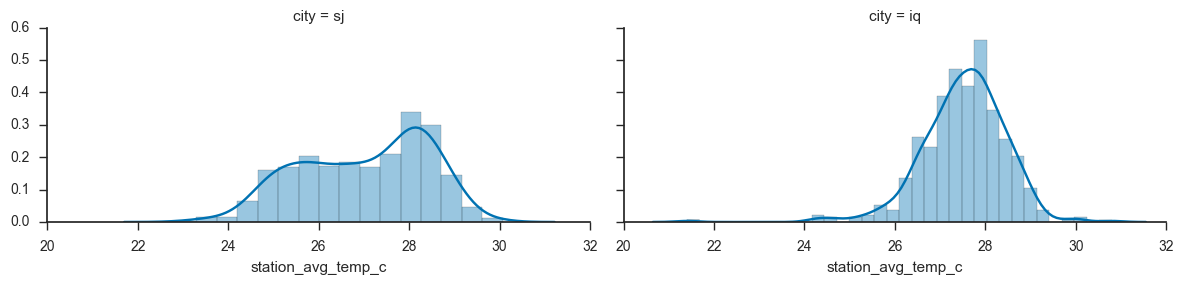

In [98]:
#Lets check the station_avg_temp_c in the city's
sns.set(style="ticks", palette="colorblind")
g = sns.FacetGrid(dengue_train, col="city",aspect=2)  
g.map(sns.distplot, "station_avg_temp_c") 

In [ ]:
#Above plot shows that Iquitos is generally a littlbe bit hotter than San Juan,and the precipitation is much higher.
#Which might one of the reason for more in total cases of dengue is more in Iquitos

In [83]:
dengue_train.groupby('city').mean().total_cases

city
iq     7.565385
sj    34.180556
Name: total_cases, dtype: float64

In [ ]:
#Surprisingly, San Juan has a lot more dengue cases than Iquitos

#Now let's check the evolution of dengue disease through time

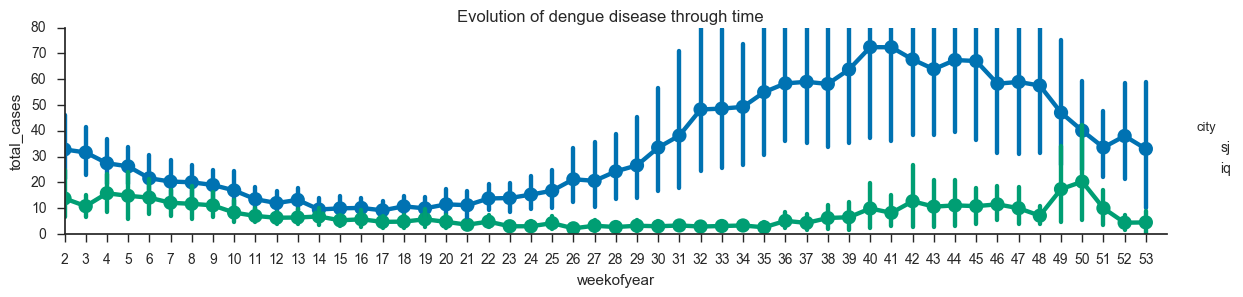

In [97]:
sns.set(style="ticks", palette="colorblind")
fig = sns.FacetGrid(dengue_train, hue='city', aspect=4) 
fig.map(sns.pointplot,'weekofyear','total_cases')
max_x = dengue_train.weekofyear.max()
min_x = dengue_train.weekofyear.min()
fig.set(xlim=(min_x,max_x))
fig.set(ylim=(0, 80))
fig.add_legend()
fig.fig.suptitle("Evolution of dengue disease through time")

In [ ]:
#In San Juan, one clear trend is that the dengue virus becomes a lot more active at the other half of the year,
#starting from July (week 28).
#In Iquitos, the disease develop much slower, with its peak at the very end of the year (week 50).

In [ ]:
#Next, let's check to see if we are missing any values in this dataset

In [75]:
#Finding the number of NUll or NaN values in the dataframe
dengue_train.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
total_cases                                0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_ma

In [204]:
dengue_features_test.isnull().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c              

In [ ]:
#We can see there is good count NaN values present in the data to Impute the NaN values we have to notice 
#they are variables liek 'precipitation' , 'specific_humidity' and so on, which will be different fror different
#city so its wise to devide the data based on city in order to impute the missing values in the Dataset

In [77]:
#Let see the count of unique city's available 

dengue_train.city.value_counts()

sj    936
iq    520
Name: city, dtype: int64

In [205]:
#Let see the count of unique city's available 

dengue_features_test.city.value_counts()

sj    260
iq    156
Name: city, dtype: int64

In [78]:
#This dataset has two cities in it: San Juan, Puerto Rico (sj) and Iquitos, Peru (iq). 
#Since we hypothesize that the spread of dengue may follow different patterns between the two,
#we will divide the dataset, train seperate models for each city, and then join our predictions before making our final submission.

In [79]:
dengue_train_sj = dengue_train[dengue_train.city == 'sj'].copy()

In [80]:
dengue_train_iq = dengue_train[dengue_train.city == 'iq'].copy()

In [206]:


dengue_test_sj = dengue_features_test[dengue_features_test.city == 'sj'].copy()
dengue_test_iq = dengue_features_test[dengue_features_test.city == 'iq'].copy()

In [81]:
dengue_train_sj.head(5)

,city,year,weekofyear,total_cases,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,4,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,5,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,4,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,3,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,6,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [108]:
dengue_train_iq.head(5)

,city,year,weekofyear,total_cases,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
936,iq,2000,26,0,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,...,43.19,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0
937,iq,2000,27,0,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,...,46.00,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6
938,iq,2000,28,0,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,...,64.77,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1
939,iq,2000,29,0,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,...,23.96,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0
940,iq,2000,30,0,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,...,31.80,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0


In [104]:
dengue_train_sj.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
total_cases                              0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min

In [ ]:
#we'll take a simple approach and just fill those values with the most recent value that we saw up to that point. 
#This is probably a good part of the problem to improve your score by getting smarter.

#With time series data, using pad/ffill is extremely common so that the “last known value” is available at every time point.
#The ffill() function is equivalent to fillna(method='ffill') and bfill() is equivalent to fillna(method='bfill')

#fillna(method='ffill') replace NaNs by preceding values in pandas DataFrame


In [103]:
dengue_train_sj.fillna(method='ffill', inplace=True)

In [106]:
dengue_train_iq.fillna(method='ffill', inplace=True)

In [208]:
#dengue_features_test

dengue_test_sj.fillna(method='ffill', inplace=True)
dengue_test_iq.fillna(method='ffill', inplace=True)

In [ ]:
#Our target variable, total_cases is a non-negative integer, which means we're looking to make some count predictions. 
#Standard regression techniques for this type of prediction include

1. Poisson regression
2. Negative binomial regression

Which techniqe will perform better depends on many things, but the choice between Poisson regression and 
negative binomial regression is pretty straightforward. Poisson regression fits according to the assumption that 
the mean and variance of the population distributiona are equal. When they aren't,specifically when the variance is 
much larger than the mean, the negative binomial approach is better. 

In [121]:
print('San Juan')
print('mean: ', dengue_train_sj.total_cases.mean())
print('var :', dengue_train_sj.total_cases.var())

print('\nIquitos')
print('mean: ', dengue_train_iq.total_cases.mean())
print('var :', dengue_train_iq.total_cases.var())

San Juan
('mean: ', 34.18055555555556)
('var :', 2640.045439691045)

Iquitos
('mean: ', 7.565384615384615)
('var :', 115.89552393656412)


In [ ]:
#variance  >>  mean suggests total_cases can be described by a negative binomial distribution, 
#so we'll use a negative binomial regression below.

In [124]:
#Which inputs strongly correlate with total_cases

# compute the correlations
sj_correlations = dengue_train_sj.corr()
iq_correlations = dengue_train_iq.corr()

In [130]:
import matplotlib.cm as cm
from matplotlib import cm
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

sj_correlations.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [129]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

iq_correlations.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [ ]:
#Many of the temperature data are strongly correlated, which is expected.
#But the total_cases variable doesn't have many obvious strong correlations.

#Interestingly, total_cases seems to only have weak correlations with other variables for both citi

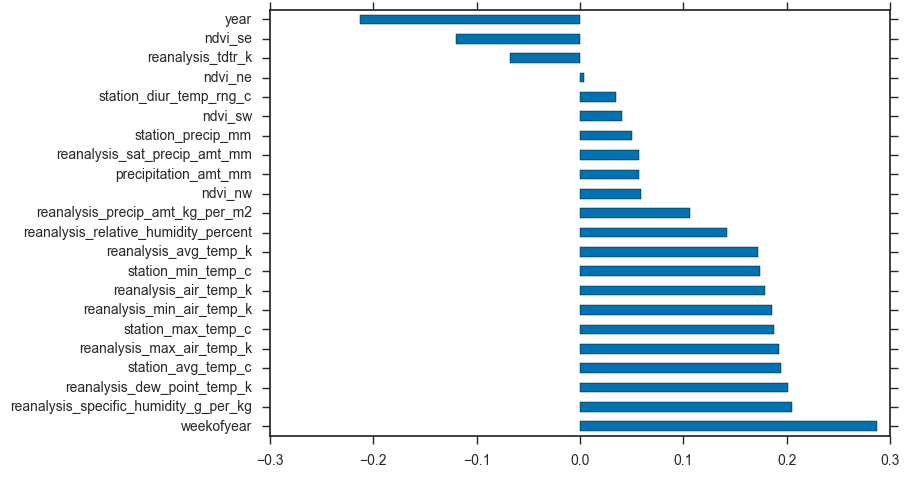

In [133]:
# San Juan
(sj_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh()
)
sns.set(style="ticks", palette="colorblind")

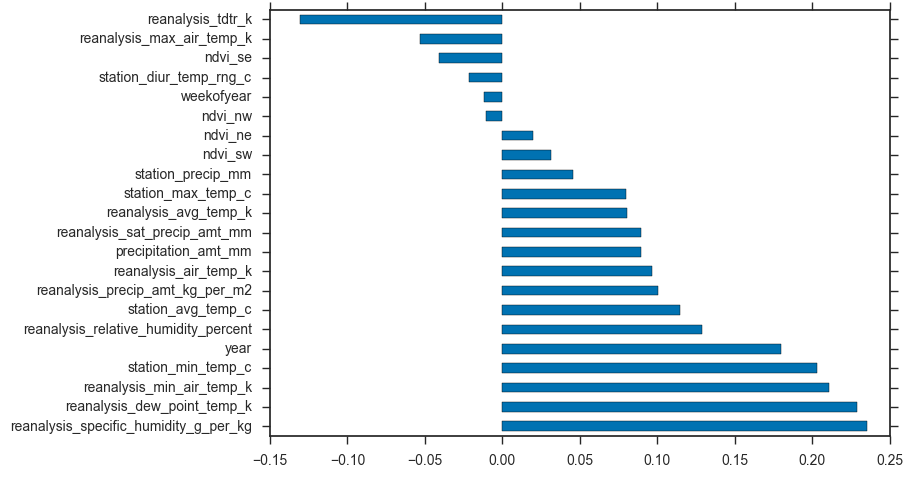

In [134]:
sns.set(style="ticks", palette="colorblind")
# iq
(iq_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh()
)

In [ ]:
#The correlation strengths differ for each city, but it looks like reanalysis_specific_humidity_g_per_kg and 
#reanalysis_dew_point_temp_k are the most strongly correlated with total_cases. 
#This makes sense: we know mosquitos thrive wet climates, the wetter the better!

#A few good variables
#reanalysis_specific_humidity_g_per_kg
#reanalysis_dew_point_temp_k
#station_avg_temp_c
#station_min_temp_c



In [138]:
#A few bad variables
#we can drop the columns with negative corellation in both 
#like reanalysis_tdtr_k, year, ndvi_ne, reanalysis_max_air_temp_k, ndvi_se, station_diur_temp_rng_c, weekofyear, ndvi_nw

# Remove `week_start_date` string.
dengue_train_sj.drop('reanalysis_tdtr_k', axis=1, inplace=True)
dengue_train_iq.drop('reanalysis_tdtr_k', axis=1, inplace=True)

dengue_train_sj.drop('year', axis=1, inplace=True)
dengue_train_iq.drop('year', axis=1, inplace=True)

dengue_train_sj.drop('ndvi_ne', axis=1, inplace=True)
dengue_train_iq.drop('ndvi_ne', axis=1, inplace=True)

dengue_train_sj.drop('reanalysis_max_air_temp_k', axis=1, inplace=True)
dengue_train_iq.drop('reanalysis_max_air_temp_k', axis=1, inplace=True)

dengue_train_sj.drop('ndvi_se', axis=1, inplace=True)
dengue_train_iq.drop('ndvi_se', axis=1, inplace=True)

dengue_train_sj.drop('station_diur_temp_rng_c', axis=1, inplace=True)
dengue_train_iq.drop('station_diur_temp_rng_c', axis=1, inplace=True)

dengue_train_sj.drop('weekofyear', axis=1, inplace=True)
dengue_train_iq.drop('weekofyear', axis=1, inplace=True)

dengue_train_sj.drop('ndvi_nw', axis=1, inplace=True)
dengue_train_iq.drop('ndvi_nw', axis=1, inplace=True)

In [ ]:
# Remove `week_start_date` string.
dengue_test_sj.drop('reanalysis_tdtr_k', axis=1, inplace=True)
dengue_test_iq.drop('reanalysis_tdtr_k', axis=1, inplace=True)

dengue_test_sj.drop('year', axis=1, inplace=True)
dengue_test_iq.drop('year', axis=1, inplace=True)

dengue_test_sj.drop('ndvi_ne', axis=1, inplace=True)
dengue_test_iq.drop('ndvi_ne', axis=1, inplace=True)

dengue_test_sj.drop('reanalysis_max_air_temp_k', axis=1, inplace=True)
dengue_test_iq.drop('reanalysis_max_air_temp_k', axis=1, inplace=True)

dengue_test_sj.drop('ndvi_se', axis=1, inplace=True)
dengue_test_iq.drop('ndvi_se', axis=1, inplace=True)

dengue_test_sj.drop('station_diur_temp_rng_c', axis=1, inplace=True)
dengue_test_iq.drop('station_diur_temp_rng_c', axis=1, inplace=True)

dengue_test_sj.drop('weekofyear', axis=1, inplace=True)
dengue_test_iq.drop('weekofyear', axis=1, inplace=True)

dengue_test_sj.drop('ndvi_nw', axis=1, inplace=True)
dengue_test_iq.drop('ndvi_nw', axis=1, inplace=True)

In [139]:
dengue_train_sj.describe

<bound method DataFrame.describe of     city  total_cases week_start_date   ndvi_sw  precipitation_amt_mm  \
0     sj            4      1990-04-30  0.177617                 12.42   
1     sj            5      1990-05-07  0.155486                 22.82   
2     sj            4      1990-05-14  0.170843                 34.54   
3     sj            3      1990-05-21  0.235886                 15.36   
4     sj            6      1990-05-28  0.247340                  7.52   
5     sj            2      1990-06-04  0.181743                  9.58   
6     sj            4      1990-06-11  0.210271                  3.48   
7     sj            5      1990-06-18  0.133029                151.12   
8     sj           10      1990-06-25  0.123600                 19.32   
9     sj            6      1990-07-02  0.202567                 14.41   
10    sj            8      1990-07-09  0.152929                 22.27   
11    sj            2      1990-07-16  0.280667                 59.17   
12    sj       

In [140]:
dengue_train_iq.describe

<bound method DataFrame.describe of      city  total_cases week_start_date   ndvi_sw  precipitation_amt_mm  \
936    iq            0      2000-07-01  0.247200                 25.41   
937    iq            0      2000-07-08  0.241657                 60.61   
938    iq            0      2000-07-15  0.128014                 55.52   
939    iq            0      2000-07-22  0.200314                  5.60   
940    iq            0      2000-07-29  0.361043                 62.76   
941    iq            0      2000-08-05  0.255314                 16.24   
942    iq            0      2000-08-12  0.387271                 89.37   
943    iq            0      2000-08-19  0.382750                 42.08   
944    iq            0      2000-08-26  0.302714                 49.22   
945    iq            0      2000-09-02  0.324257                 53.65   
946    iq            1      2000-09-09  0.265929                 23.12   
947    iq            0      2000-09-16  0.328157                 34.62   
94

In [146]:
#Split it up!
#Since this is a timeseries model, we'll use a strict-future holdout set when we are splitting our train set and our test set.
#We'll keep around three quarters of the original data for training and use the rest to test. 
#We'll do this separately for our San Juan model and for our Iquitos model.

print('San Juan')
print(dengue_train_sj.shape)

print('\nIquitos')
print(dengue_train_iq.shape)

San Juan
(936, 17)

Iquitos
(520, 17)


In [214]:
print('San Juan')
print(dengue_test_sj.shape)

print('\nIquitos')
print(dengue_test_iq.shape)

San Juan
(260, 23)

Iquitos
(156, 24)


In [198]:

sj_train_subtrain = dengue_train_sj.head(800)
sj_train_subtest = dengue_train_sj.tail(dengue_train_sj.shape[0] - 800)

iq_train_subtrain = dengue_train_iq.head(400)
iq_train_subtest = dengue_train_iq.tail(dengue_train_iq.shape[0] - 400)

In [199]:
sj_train_subtrain.head(1)

,city,total_cases,week_start_date,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,4,1990-04-30,0.177617,12.42,297.572857,297.742857,292.414286,295.9,32.0,73.365714,12.42,14.012857,25.442857,29.4,20.0,16.0


In [219]:
from statsmodels.tools import eval_measures
import statsmodels.formula.api as smf

from sklearn.cross_validation import train_test_split
import statsmodels.api as sm


from statsmodels.tools import eval_measures
import statsmodels.formula.api as smf

def get_best_model(train, test):
    # Step 1: specify the form of the model
    model_formula = "total_cases ~ 1 + " \
                    "reanalysis_specific_humidity_g_per_kg + " \
                    "reanalysis_dew_point_temp_k + " \
                    "reanalysis_min_air_temp_k + " \
                    "station_min_temp_c + " \
                    "station_max_temp_c + " \
                    "station_avg_temp_c"
                    
        
    
    grid = 10 ** np.arange(-8, -3, dtype=np.float64)
                    
    best_alpha = []
    best_score = 1000
        
    # Step 2: Find the best hyper parameter, alpha
    for alpha in grid:
        model = smf.glm(formula=model_formula,
                        data=train,
                        family=sm.families.NegativeBinomial(alpha=alpha))

        results = model.fit()
        predictions = results.predict(test).astype(int)
        score = eval_measures.meanabs(predictions, test.total_cases)

        if score < best_score:
            best_alpha = alpha
            best_score = score

    print('best alpha = ', best_alpha)
    print('best score = ', best_score)
            
    # Step 3: refit on entire dataset
    full_dataset = pd.concat([train, test])
    model = smf.glm(formula=model_formula,
                    data=full_dataset,
                    family=sm.families.NegativeBinomial(alpha=best_alpha))

    fitted_model = model.fit()
    return fitted_model
    
sj_best_model = get_best_model(sj_train_subtrain, sj_train_subtest)
iq_best_model = get_best_model(iq_train_subtrain, iq_train_subtest)

('best alpha = ', 1e-08)
('best score = ', 22.632352941176471)
('best alpha = ', 1e-08)
('best score = ', 6.6416666666666666)


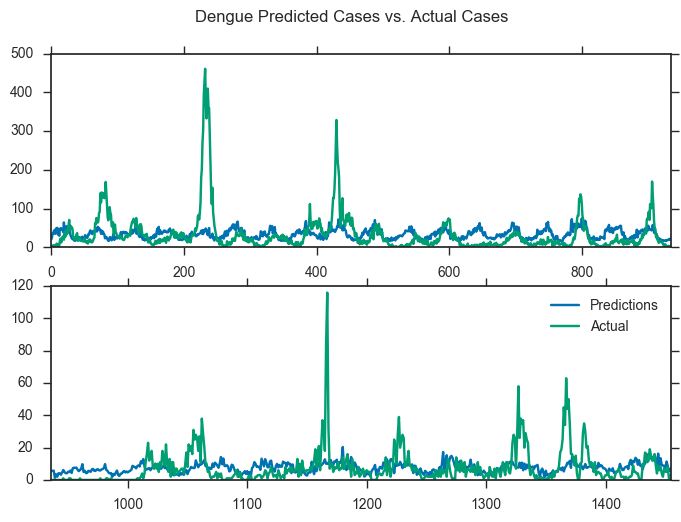

In [220]:

figs, axes = plt.subplots(nrows=2, ncols=1)

# plot sj
dengue_train_sj['fitted'] = sj_best_model.fittedvalues
dengue_train_sj.fitted.plot(ax=axes[0], label="Predictions")
dengue_train_sj.total_cases.plot(ax=axes[0], label="Actual")

# plot iq
dengue_train_iq['fitted'] = iq_best_model.fittedvalues
dengue_train_iq.fitted.plot(ax=axes[1], label="Predictions")
dengue_train_iq.total_cases.plot(ax=axes[1], label="Actual")

plt.suptitle("Dengue Predicted Cases vs. Actual Cases")
plt.legend()

In [221]:
sj_predictions = sj_best_model.predict(dengue_test_sj).astype(int)
iq_predictions = iq_best_model.predict(dengue_test_iq).astype(int)

submission = pd.read_csv("F:/OneDrive - Texas Tech University/MastersDocuments/DS-Predictive Analytics/DengAI/DataSet/submission_format.csv",
                         index_col=[0, 1, 2])

submission.total_cases = np.concatenate([sj_predictions, iq_predictions])
submission.to_csv("F:/OneDrive - Texas Tech University/MastersDocuments/DS-Predictive Analytics/DengAI/DataSet/Model_1_Forecasted_Values.csv")

In [ ]:
#These graphs can actually tell us a lot about where our model is going wrong and give us some good hints about where investments
#will improve the model performance.
#For example, we see that our model in blue does track the seasonality of Dengue cases. 